### Imports

In [1]:
import cv2
import numpy as np
from scipy.spatial import distance

from utils_plot import plot3dSurfacesGrid
from TemplateMatching import TemplateMatching

### Constants

In [2]:
PATH_FILE_PLATES = './file/in-plates.jpg'
PATH_FILE_PLATE_1 = './file/in-plate-01.jpg'
PATH_FILE_PLATE_2 = './file/in-plate-02.jpg'

## Matching

### Default Open CV

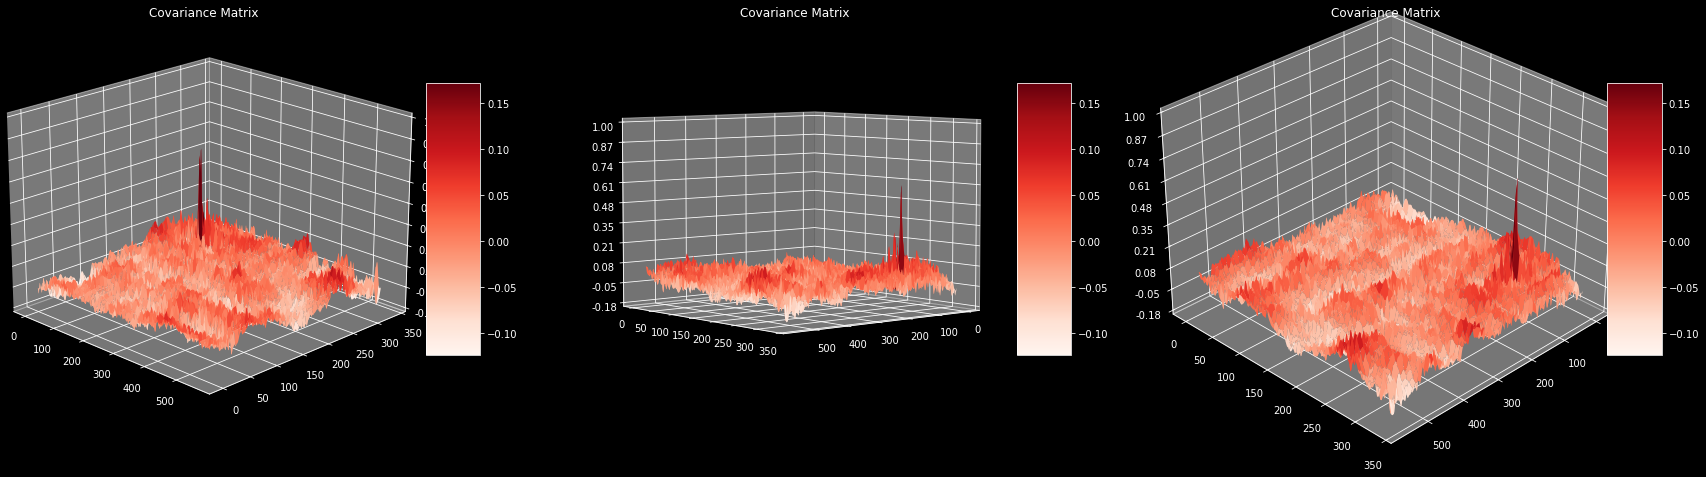

In [4]:

# Do the matching
templateMatcher = TemplateMatching(PATH_FILE_PLATES, PATH_FILE_PLATE_1)
covarMatrix = templateMatcher.match().getCovarMatrix()

# Build grid
meshX = np.arange(0, covarMatrix.shape[1], 1)
meshY = np.arange(0, covarMatrix.shape[0], 1)

surfaces = []

# Set the squared distances surface
surfaces.append( (meshX, meshY, covarMatrix, True, 'Covariance Matrix') )

# Plot surfaces
plot3dSurfacesGrid(
    surfaces=surfaces,
    gridRows = 1, gridCols = 3,
    colHeight = 10, colWidth = 10,
    positions=[(-45, 20, 9), (50, 5, 10), (45, 30, 8)]
)

### Minkowski Distance

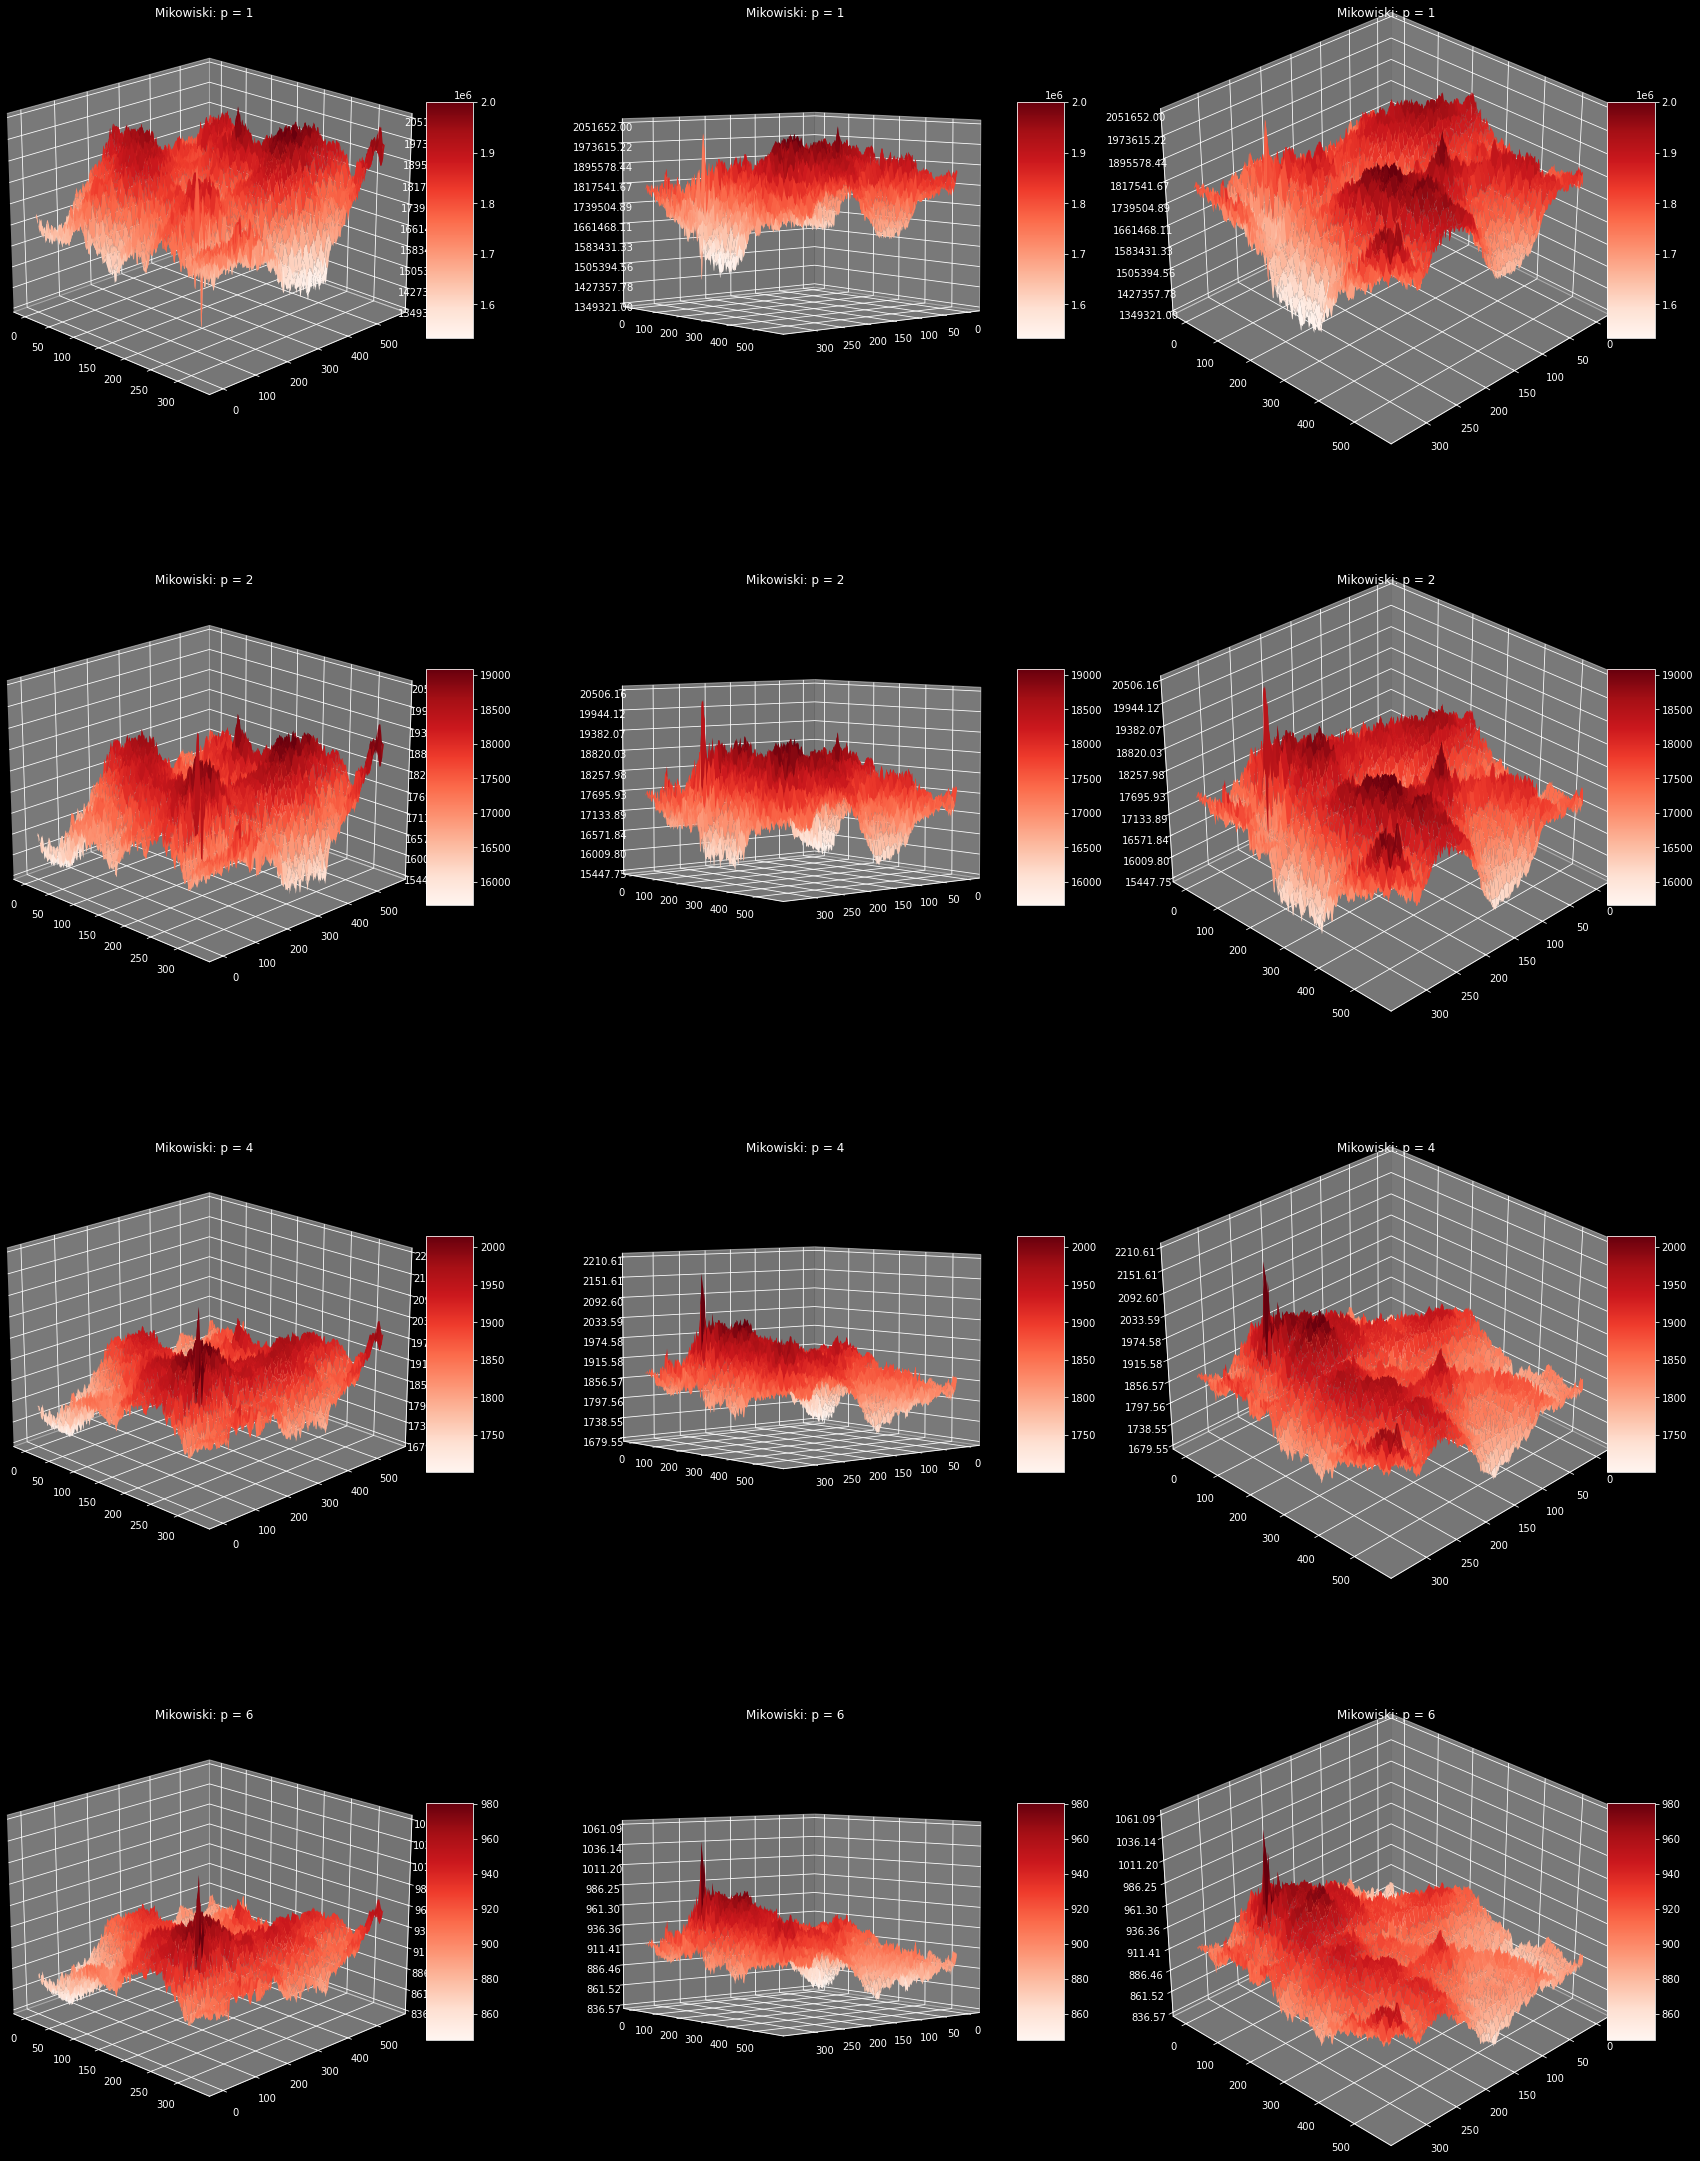

In [3]:

def minkowskiDistanceSurface(imgGray: np.array, templateGray: np.array, p: int) -> tuple:
    
    iWidth, iHeight = imgGray.shape
    tWidth, tHeight = templateGray.shape

    # Calculate matrix of distances
    tVec = templateGray.reshape( (templateGray.size,) ) # Template img matrix 1d array

    mWidth = iWidth - tWidth
    mHeight = iHeight - tHeight
    mDistances = np.zeros( (mWidth, mHeight) )

    x = 0
    y = 0

    for x in range(0, mWidth):
        for y in range(0, mHeight):
            iSubmatrix = imgGray[ x:(x + tWidth), y:(y + tHeight) ] # Image submatrix of template size
            iVec = iSubmatrix.reshape( (iSubmatrix.size,) )         # Image submatrix as 1d array
            mDistances[x, y] = distance.minkowski(iVec, tVec, p=p)

    # Build grid
    meshX = np.arange(0, mDistances.shape[1], 1)
    meshY = np.arange(0, mDistances.shape[0], 1)

    # Generate distances surface parameters
    return (meshX, meshY, mDistances, True, 'Mikowiski: p = ' + str(p))


# Read images
imgRgb = cv2.imread(PATH_FILE_PLATES)
templateRgb = cv2.imread(PATH_FILE_PLATE_1)
    
imgGray = cv2.cvtColor(imgRgb, cv2.COLOR_BGR2GRAY).T
templateGray = cv2.cvtColor(templateRgb, cv2.COLOR_BGR2GRAY).T

# Calculate distances with different values of minkowski power
surfaces = []
for p in [1, 2, 4, 6]:
    surfaces.append(minkowskiDistanceSurface(imgGray, templateGray, p))

# Plot surfaces
plot3dSurfacesGrid(
    surfaces=surfaces,
    gridCols = 3,
    colHeight = 10, colWidth = 10,
    positions=[(-45, 20, 9), (50, 5, 10), (45, 30, 8)]
)